# PCOS Diagnosis
***
## Table of Contents
1. [Introduction](#1-introduction)
1. [Loading Data](#2-loading-data)
1. [Data Preprocessing](#3-data-preprocessing)
    - [Correcting Feature Names](#correcting-feature-names)
    - [Dropping Unnecessary Features](#dropping-unnecessary-features)
    - [Dealing with Missing Values](#dealing-with-missing-values)
    - [Modifying Wrong Data Types](#modifying-wrong-data-types)
    - [Standardisation](#standardisation)
1. [Exploratory Data Analysis](#4-exploratory-data-analysis)
1. [Predictive Modelling](#5-predictive-modelling)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Evaluation on Test Data](#evaluation-on-test-data)
1. [Conclusion](#6-conclusion)
1. [References](#7-references)
***


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import Dict, Any

## 1. Introduction
Polycystic Ovary Syndrome (PCOS) is a common endocrine disorder among women of reproductive age, often leading to irregular menstrual cycles, infertility, and metabolic complications. Early and accurate diagnosis is crucial for effective treatment and long-term health management.

The objective of this project is to develop and compare multiple predictive models to identify the most effective approach for PCOS diagnosis. By analysing key features and optimising model performance, this project seeks to support clinical decision-making and contribute to data-driven healthcare solutions for PCOS detection. 

## 2. Loading Data

The dataset used in this project (retrieved from [Kaggle - Polycystic ovary syndrome (PCOS)](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos)) contains clinical, demographic, and biochemical measurements relevant for PCOS diagnosis. The data were collected from ten different hospital across Kerala, India.

- **Sl. No**: Serial number of the record.
- **Patient File No.**: Unique patient identifier.
- **PCOS (Y/N)**: Whether the patient has been diagnosed with PCOS(1 = Yes, 0 = No). Target variable.
- **Age (yrs)**: Patient's age in years.
- **Weight (Kg)**: Body weight in kilograms.
- **Height (Cm)**: Height in centimetres.
- **BMI**: Body Mass Index, calculated as weight ($kg$) divided by height ($m^2$)
- **Blood Group**: Encoded as integers (A+ = 11, A- = 12, B+ = 13, B- =14, O+ = 15, O- = 16, AB+ = 17, AB= = 18).
- **Pulse rate (bpm)**: Heart rate in beats per minute.
- **RR (breaths/min)**: Respiratory rate.
- **Hb (g/dl)**: Haemoglobin level.
- **Cycle (R/I)**: Menstrual cycle regularity (Regular/Irregular)
- **Cycle length (days)**: Duration of menstrual cycle.
- **Marriage Status (Yrs)**: Years since marriage.
- **Pregnant (Y/N)**: Pregnancy status (1 = Yes, 0 = No).
- **No. of abortions**: Number of miscarriages.
- **I beta-HCG (mIU/mL)**: First beta-human chorionic gonadotropin value.
- **II beta-HCG (mIU/mL)**: Second beta-human chorionic gonadotropin value.
- **FSH (mIU/mL)**: Follicle-stimulating hormone.
- **LH (mIU/mL)**: Luteinising hormone.
- **FSH/LH**: Ratio of FSH to LH.
- **Hip (inch)**: Hip circumference.
- **Waist (inch)**: Waist circumference.
- **Waist:Hip Ratio**: Ratio of waist to hip circumference.
- **TSH (mIU/L)**: Thyroid-stimulating hormone.
- **AMH (ng/mL)**: Anti-Müllerian hormone.
- **PRL (ng/mL)**: Prolactin.
- **Vit D3 (ng/mL)**: Vitamin D3.
- **PRG (ng/mL)**: Progesterone.
- **RBS (mg/dl)**: Random blood glucose.
- **Weight gain (Y/N)**: History of weight gain (1 = Yes, 0 = No).
- **Hair growth (Y/N)**: Presence of hirsutism (1 = Yes, 0 = No).
- **Skin darkening (Y/N)**: Hyperpigmentation (1 = Yes, 0 = No).
- **Hair loss (Y/N)**: Androgenic alopecia (1 = Yes, 0 = No).
- **Pimples (Y/N)**: Acne (1 = Yes, 0 = No).
- **Fast food (Y/N)**: Fast food consumption (1 = Yes, 0 = No).
- **Reg. Exercise (Y/N)**: Regular exercise (1 = Yes, 0 = No).
- **BP Systolic (mmHg)**: Systolic blood pressure.
- **BP Diastolic (mmHg)**: Diastolic blood pressure.
- **Follicle No. (L)**: Number of ovarian follicles (left ovary).
- **Follicle No. (R)**: Number of ovarian follicles (right ovary).
- **Avg. F size (L) (mm)**: Average follicle size (left ovary).
- **Avg. F size (R) (mm)**: Average follicle size (right ovary).
- **Endometrium (mm)**: Endometrial thickness.

In [2]:
df = pd.read_excel("_datasets/PCOS_data.xlsx", sheet_name="Full_new")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [3]:
df.shape

(541, 45)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [5]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


## 3. Data Preprocessing
- Drop unnecessary features.
- Correct feature names.
- Deal with missing values.
- Modify wrong data types.
- Standardisation

### Correcting Feature Names

In [6]:
df["Marriage Status (Yrs)"] = df["Marraige Status (Yrs)"]

### Dropping Unnecessary Features

In [7]:
df = df.drop(
    columns=["Unnamed: 44", "Sl. No", "Patient File No.", "Marraige Status (Yrs)"]
)

### Dealing with Missing Values

In [8]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Fast food (Y/N)          1
Marriage Status (Yrs)    1
dtype: int64

According to the null check, the columns `Marriage Status (Yrs)` and `Fast food (Y/N)` each contain one missing value. The missing value in `Marriage Status (Yrs)` will be replaced with the median of the feature, while the one in `Fast food (Y/N)` will be replaced with the most frequent value (mode).

In [9]:
df["Marriage Status (Yrs)"] = df["Marriage Status (Yrs)"].fillna(
    df["Marriage Status (Yrs)"].median()
)
df["Fast food (Y/N)"] = df["Fast food (Y/N)"].fillna(df["Fast food (Y/N)"].mode()[0])

null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

### Modifying Wrong Data Types
The columns `II    beta-HCG(mIU/mL)` and `AMH(ng/mL)` include three different datatypes. Therefore, they will be converted to float.

In [10]:
n_datatypes_II = df["II    beta-HCG(mIU/mL)"].apply(type).nunique()
n_datatypes_AMH = df["AMH(ng/mL)"].apply(type).nunique()

types_in_col_II = set(type(x) for x in df["II    beta-HCG(mIU/mL)"])
types_in_col_AMH = set(type(x) for x in df["AMH(ng/mL)"])

print(
    f"'II    beta-HCG(mIU/mL)' contains {n_datatypes_II} datatypes: {types_in_col_II}"
)
print(f"'AMH(ng/mL)' contains {n_datatypes_AMH} datatypes: {types_in_col_AMH}")

'II    beta-HCG(mIU/mL)' contains 3 datatypes: {<class 'int'>, <class 'str'>, <class 'float'>}
'AMH(ng/mL)' contains 3 datatypes: {<class 'int'>, <class 'str'>, <class 'float'>}


A couple of typographical errors have been identified, which must be addressed manually prior to converting data types:
- '1.99.' -> '1.99' (`II    beta-HCG(mIU/mL)`)
- 'a' -> median() (`AMH(ng/mL)`)

In [11]:
df.loc[123, "II    beta-HCG(mIU/mL)"] = df.loc[123, "II    beta-HCG(mIU/mL)"][:-1]
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"])

In [12]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")
df["AMH(ng/mL)"] = df["AMH(ng/mL)"].fillna(df["AMH(ng/mL)"].median())

In [13]:
n_datatypes_II = df["II    beta-HCG(mIU/mL)"].apply(type).nunique()
n_datatypes_AMH = df["AMH(ng/mL)"].apply(type).nunique()

types_in_col_II = set(type(x) for x in df["II    beta-HCG(mIU/mL)"])
types_in_col_AMH = set(type(x) for x in df["AMH(ng/mL)"])

print(
    f"'II    beta-HCG(mIU/mL)' contains {n_datatypes_II} datatypes: {types_in_col_II}"
)
print(f"'AMH(ng/mL)' contains {n_datatypes_AMH} datatypes: {types_in_col_AMH}")

'II    beta-HCG(mIU/mL)' contains 1 datatypes: {<class 'float'>}
'AMH(ng/mL)' contains 1 datatypes: {<class 'float'>}


### Standardisation
Some machine learning models, such as Linear Regression (especially with regularisation), K-Nearest Neighbours (KNN), and Support Vector Machines (SVM), are sensitive to the scale of input features because they compute distances or rely on dot products. Therefore, feature scaling is essential to ensure fair contribution of each feature and to avoid biased results.

Standardisation is generally preferred for most algorithms when features are normally distributed or when using regularised models. Normalisation would be useful if the data are not Gaussian or when we want all features strictly in the same range (e.g., for neural networks)

- Scale all numerical features (including boolean features).
- Always fit the scaler **only on training features** (X_train) and use it to transform test features (X_test).
- `.fit_transform(X_train)` and `.transform(X_test)`
- Do not scale the target variable unless there is a specific reason.
    - If the target variable needs to be scaled, invert the transformation before interpreting results.


This process will be included in Pipeline.

## 4. Exploratory Data Analysis

In [14]:
def plot_correlation_matrix(df: pd.DataFrame, method: str = "pearson") -> pd.DataFrame:
    """
    Plot a correlation matrix heatmap for all numerical columns in a DataFrame.

    Args:
        df: The input DataFrame containing the dataset.
        method: The correlation method to use. Supported values are
            'pearson', 'kendall', and 'spearman'. Defaults to 'pearson'.

    Return:
        A DataFrame containing correlations.
    """
    num_columns = df.select_dtypes(include="number")
    plt.figure(figsize=(12, 8))
    corr = num_columns.corr(method=method)
    sns.heatmap(corr, square=True)
    plt.title(f"{method.title()} Correlation Matrix")
    plt.xticks(rotation=45, ha="right")
    plt.yticks()
    plt.tight_layout()
    plt.show()
    return corr

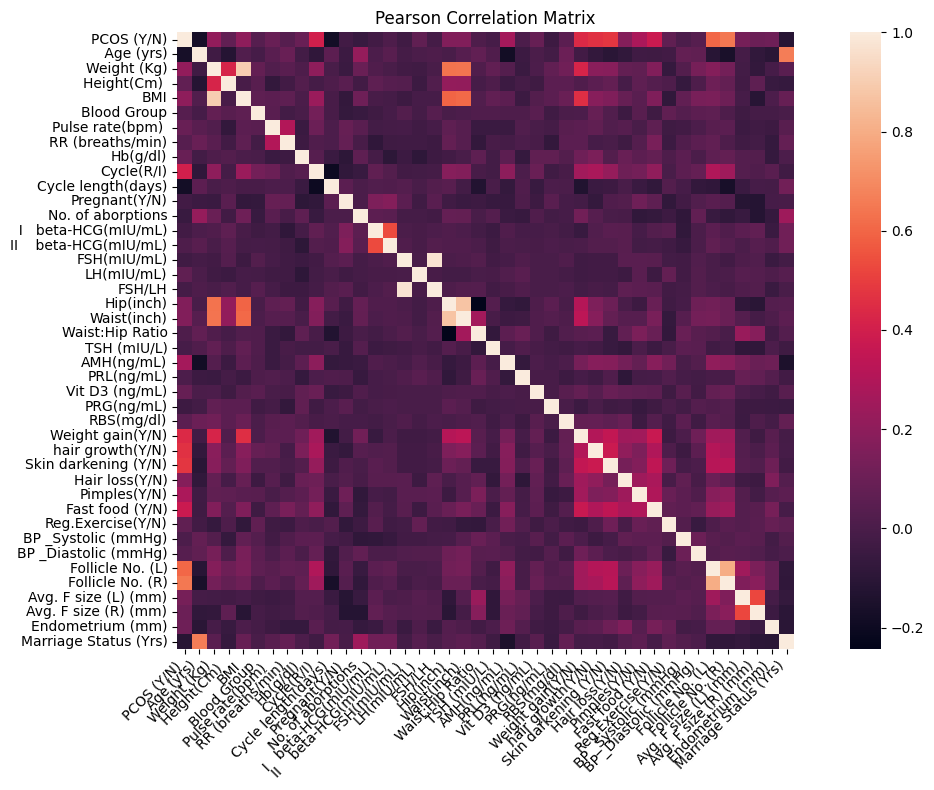

In [15]:
corr_matrix = plot_correlation_matrix(df)

Here are the top ten features correlated with the diagnosis of PCOS in descending order.

In [16]:
corr_matrix["PCOS (Y/N)"].sort_values(ascending=False)[:10]

PCOS (Y/N)              1.000000
Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Cycle(R/I)              0.401644
Fast food (Y/N)         0.376183
Pimples(Y/N)            0.286077
AMH(ng/mL)              0.264141
Name: PCOS (Y/N), dtype: float64

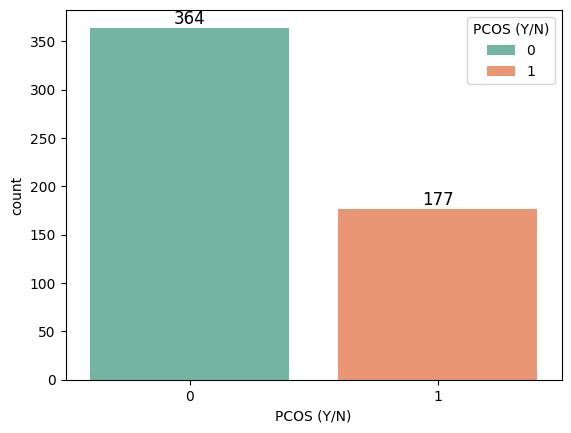

In [17]:
ax = sns.countplot(df, x="PCOS (Y/N)", hue="PCOS (Y/N)", palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
plt.show()

The imbalance of the target value may result in poor predictive performance, especially for minority class. To address this issue, we can either **oversample the minority class** or **undersamble the majority class** during training process. 

## 5. Predictive Modelling
For this dataset, the following six classifiers will be compared and evaluted:
- Logistic Regression
- K-Nearest Neighbour Classifier
- Support Vector Machine
- Decision Tree Classifier
- Random Forest Classifier
- XGBoost Classifier

In [18]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Hyperparameter Tuning
Optimisation of hyperparameters is essential to obtain the best performance from machine learning models. **Grid Search** or **Random Search** is typically used to find the best hyperparameters with cross-validation.

We use the stratified K-Fold cross-validator `StratifiedKFold()`. With this approach, each fold maintains approximately the same percentage of samples for each class as found in the original dataset. This technique is especially suitable for classification problems with imbalanced classes, preventing bias caused by random splitting and ensuring fair evaluation of all classes.

Instead of manually repeating the hyperparameter tuning process for each model under evaluation, we can employ a `Pipeline` to automate the entire workflow. A pipeline establishes a structured sequence for data preprocessing, model building, and evaluation. This approach enables us to modularise the machine learning process, making it significantly more efficient and scalable. Firstly, let's define classifiers and parameter grids for all the models.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [20]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
}

param_grids = {
    "Logistic Regression": {
        "clf__C": [0.01, 0.1, 1, 10, 100],
        "clf__solver": ["lbfgs", "liblinear"],
        "clf__penalty": ["l2"],
    },
    "KNN": {
        "clf__n_neighbors": [3, 5, 7, 9],
        "clf__weights": ["uniform", "distance"],
        "clf__metric": ["euclidean", "manhattan"],
    },
    "SVM": {
        "clf__C": [0.1, 1, 10, 100],
        "clf__kernel": ["rbf", "linear"],
        "clf__gamma": ["scale", "auto"],
    },
    "Decision Tree": {
        "clf__max_depth": [None, 5, 10, 20],
        "clf__min_samples_split": [2, 5, 10],
        "clf__criterion": ["gini", "entropy"],
    },
    "Random Forest": {
        "clf__n_estimators": [50, 100, 200],
        "clf__max_depth": [None, 5, 10, 20],
        "clf__min_samples_split": [2, 5, 10],
        "clf__max_features": [None, "sqrt", "log2"],
    },
    "XGBoost": {
        "clf__n_estimators": [50, 100, 200],
        "clf__max_depth": [3, 5, 7],
        "clf__learning_rate": [0.01, 0.1, 0.2],
        "clf__subsample": [0.6, 0.8, 1.0],
        "clf__colsample_bytree": [0.6, 0.8, 1.0],
    },
}


As mentioned in [4. Exploratory Data Analysis](#4-exploratory-data-analysis), the target variable shows class imbalance, which may result in misleading performance metrics. To address this, we employ the **Synthetic Minority Oversampling Technique** (SMOTE), which generates synthetic samples for the minority class by interpolating between existing minority instances. This approach reduces overfitting compared to simple duplication.

SMOTE is an oversampler from the imbalanced-learn library, and while it does implement the necessary methods, it is not compatible with `sklearn.pipeline.Pipeline`. Instead, `imblearn.pipeline.Pipeline` must be used to work with samplers in `imblearn`.

In [21]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


def find_best_estimators(
    classifiers: Dict[str, Any],
    X_train: pd.DataFrame,
    y_train: pd.Series,
    n_splits: int = 5,
) -> Dict[str, Any]:
    """
    Perform hyperparameter tuning using GridSearchCV with SMOTE oversampling for multiple classifiers.

    Args:
        classifiers: A dictionary where keys are classifier names (str) and values are
            classifier instances (e.g., scikit-learn estimators).
        X_train: Training features.
        y_train: Training target labels.
        n_splits: Number of splits for StratifiedKFold cross-validation. Defaults to 5.

    Returns:
        A dictionary mapping classifier names to their best fitted pipeline (including preprocessing,
            SMOTE, and the classifier with optimal hyperparameters).

    """
    best_estimators = {}
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for name, clf in classifiers.items():
        print(f"\n===== {name} =====")
        pipeline = Pipeline(
            [
                ("scaler", StandardScaler()),
                ("smote", SMOTE(random_state=42)),
                ("clf", clf),
            ]
        )  # StandardScaler + SMOTE + classifier
        param_grid = param_grids[name]
        grid = GridSearchCV(
            estimator=pipeline, param_grid=param_grid, scoring="f1", cv=skf, n_jobs=-1
        )
        grid.fit(X_train, y_train)
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best mean cross-validated F1-score: {grid.best_score_:.4f}")
        best_estimators[name] = grid.best_estimator_
    return best_estimators

In [22]:
best_estimators = find_best_estimators(
    classifiers=classifiers, X_train=X_train, y_train=y_train
)


===== Logistic Regression =====
Best hyperparameters for Logistic Regression: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best mean cross-validated F1-score: 0.8184

===== KNN =====
Best hyperparameters for KNN: {'clf__metric': 'manhattan', 'clf__n_neighbors': 7, 'clf__weights': 'uniform'}
Best mean cross-validated F1-score: 0.8200

===== SVM =====
Best hyperparameters for SVM: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Best mean cross-validated F1-score: 0.8307

===== Decision Tree =====
Best hyperparameters for Decision Tree: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_split': 2}
Best mean cross-validated F1-score: 0.7525

===== Random Forest =====
Best hyperparameters for Random Forest: {'clf__max_depth': None, 'clf__max_features': 'log2', 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Best mean cross-validated F1-score: 0.8597

===== XGBoost =====
Best hyperparameters for XGBoost: {'clf__colsample_bytree': 0.6, 

### Evaluation on Test Data

In [23]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)


def evaluate_classifier(
    model: Dict[str, Any], X_test: pd.DataFrame, y_test: pd.Series, model_name: str
) -> Dict[str, Any]:
    """
    Evaluate a trained classification model on a test dataset and visualise the confusion matrix.

    This function computes several standard classification metrics—including accuracy, precision,
    recall, F1-score, and ROC-AUC—based on the model's predictions. It also displays the confusion
    matrix as a heatmap and prints a detailed classification report.

    Args:
        model: The trained classification model supporting the .predict() method (e.g., scikit-learn estimator).
        X_test: Test feature data.
        y_test: True labels for the test data.
        model_name: Name of the model.

    Returns:
        A dictionary containing the following evaluation metrics (rounded to four decimal places):
            - 'Accuracy': Overall accuracy of the classifier.
            - 'Precision': Precision score, representing the ratio of true positives to all predicted positives.
            - 'Recall': Recall score, representing the ratio of true positives to all actual positives.
            - 'F1-Score': Harmonic mean of precision and recall.
            - 'ROC-AUC': Area under the Receiver Operating Characteristic curve.
    """
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred), 4)
    pre = round(precision_score(y_test, y_pred), 4)
    rec = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    roc_auc = round(roc_auc_score(y_test, y_pred), 4)

    c_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Reds")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    print(
        f"Classification Report ({model_name}):\n {classification_report(y_test, y_pred)}"
    )
    return {
        "Accuracy": acc,
        "Precision": pre,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
    }

In [24]:
best_model_log_reg = best_estimators["Logistic Regression"]
best_model_knn = best_estimators["KNN"]
best_model_svm = best_estimators["SVM"]
best_model_dt = best_estimators["Decision Tree"]
best_model_rf = best_estimators["Random Forest"]
best_model_xgb = best_estimators["XGBoost"]

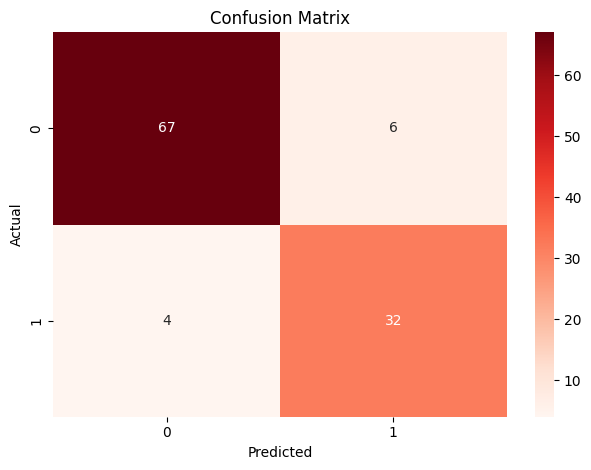

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.84      0.89      0.86        36

    accuracy                           0.91       109
   macro avg       0.89      0.90      0.90       109
weighted avg       0.91      0.91      0.91       109



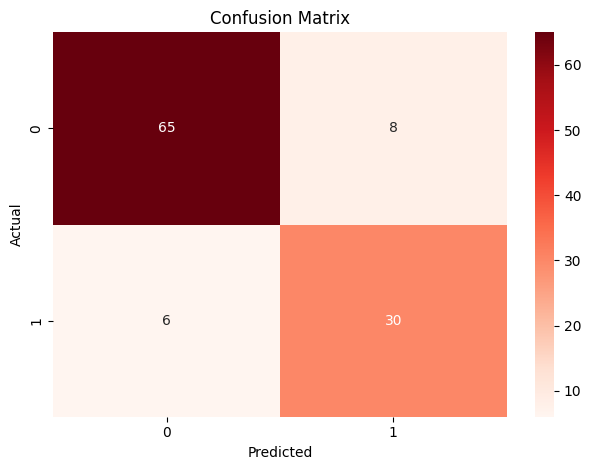

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.92      0.89      0.90        73
           1       0.79      0.83      0.81        36

    accuracy                           0.87       109
   macro avg       0.85      0.86      0.86       109
weighted avg       0.87      0.87      0.87       109



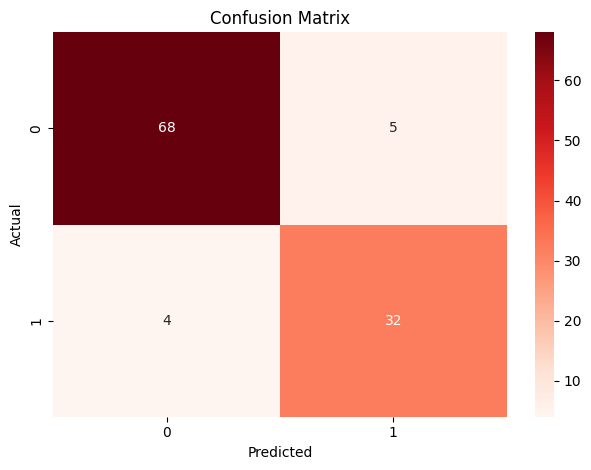

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.86      0.89      0.88        36

    accuracy                           0.92       109
   macro avg       0.90      0.91      0.91       109
weighted avg       0.92      0.92      0.92       109



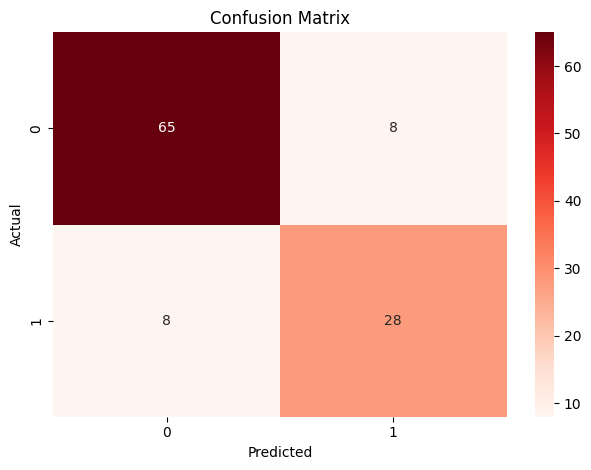

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        73
           1       0.78      0.78      0.78        36

    accuracy                           0.85       109
   macro avg       0.83      0.83      0.83       109
weighted avg       0.85      0.85      0.85       109



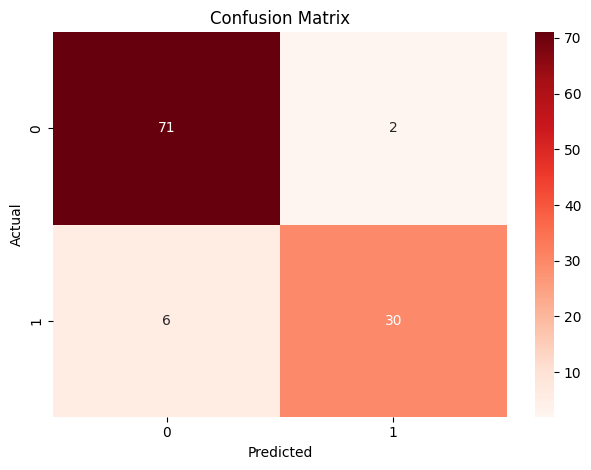

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        73
           1       0.94      0.83      0.88        36

    accuracy                           0.93       109
   macro avg       0.93      0.90      0.91       109
weighted avg       0.93      0.93      0.93       109



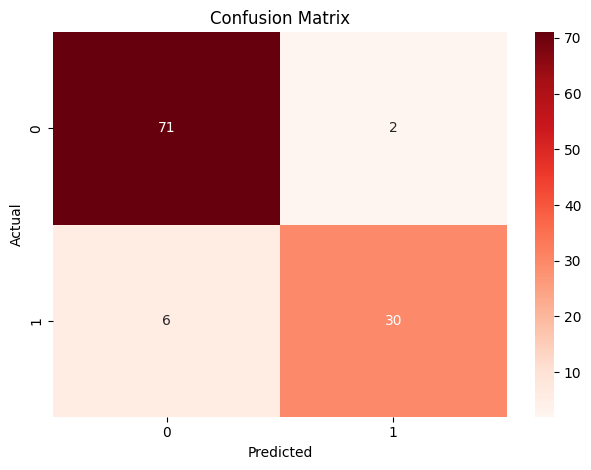

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        73
           1       0.94      0.83      0.88        36

    accuracy                           0.93       109
   macro avg       0.93      0.90      0.91       109
weighted avg       0.93      0.93      0.93       109



In [25]:
results_log_reg = evaluate_classifier(
    best_model_log_reg, X_test, y_test, "Logistic Regression"
)
results_knn = evaluate_classifier(best_model_knn, X_test, y_test, "KNN")
results_svm = evaluate_classifier(best_model_svm, X_test, y_test, "SVM")
results_dt = evaluate_classifier(best_model_dt, X_test, y_test, "Decision Tree")
results_rf = evaluate_classifier(best_model_rf, X_test, y_test, "Random Forest")
results_xgb = evaluate_classifier(best_model_xgb, X_test, y_test, "XGBoost")

In [26]:
results_df = pd.DataFrame(
    [results_log_reg, results_knn, results_svm, results_dt, results_rf, results_xgb],
    index=[
        "Logistic Regression",
        "KNN",
        "SVM",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
    ],
)
print(results_df)

                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.9083     0.8421  0.8889    0.8649   0.9033
KNN                    0.8716     0.7895  0.8333    0.8108   0.8619
SVM                    0.9174     0.8649  0.8889    0.8767   0.9102
Decision Tree          0.8532     0.7778  0.7778    0.7778   0.8341
Random Forest          0.9266     0.9375  0.8333    0.8824   0.9030
XGBoost                0.9266     0.9375  0.8333    0.8824   0.9030


## 6. Conclusion
A comparative analysis of six different preditive models applied to the dataset of PCOS diagnosis yields the following key insights:

**Overall Performance**:
- Random Forest and XGBoost achieved the highest accuracy ($0.9266$), F1-score ($0.8824$), indicating excellent overall preditive performance and balance between precision and recall.
- SVM also provided a great result with an accuracy of $0.9174$ and F1-score of $0.8767$, demonstrating the effectiveness of support vector machines for this classification task.
- Logistic Regression performed strong results with an accuracy of $0.9083$ and F1-score of $0.8649$. This highlights that simpler linear models can be highly competitive when appropriately tuned and preprocessed.
- KNN has the lowest scores across most metrics, reflecting its sensitibity to feature scaling, parameter choice, and potentially the curse of dimensionality.

**Minority Class Focus (Recall, F1-Score)**:
- Recall is crucial for PCOS detection, as false negatives (missed diagnoses) are especially undesirable in medical settings.
- All top-performing models (SVM, XGBoost, Logistic Regression) achieved a recall of $0.8333 - 0.8889$, indicating a higher ability to correctly identify positive PCOS cases than the other two models (Random Forest and Decision Tree).

**Discriminative Ability (ROC-AUC)**:
- SVM achieved the highest ROC-AUC ($0.9102$), closely followed by Logistic Regression ($0.9033$), Random Forest ($0.9030$) and XGBoost ($0.9033$). These values indicate a strong ability to distinguish between positive and negative cases across all thresholds.

**Precision**:
- Random Forest and XGBoost achieved the highest precision ($0.9375$), indicating a lower rate of false positives. However, their recall is slightly lower than that of SVM and Logistic Regression, which may be less desirable in medical screening, where missing true cases is more problematic than over-identification.

Considering these results, the best model choices for this PCOS prediction task are **Random Forest** and **XGBoost**. However, **SVM (with a linear kernel)** and **Logistic Regression** also provide strong performance thus remain strong alternatives, particularly when recall is of paramount importance. 

## 7. References

1. Christ, J. P., & Cedars, M. I. (2023). *Current Guidelines for Diagnosing PCOS*. Diagnostics (Basel, Switzerland), 13(6), 1113.<br>
https://doi.org/10.3390/diagnostics13061113

1. GeeksforGeeks. (2024). *Handling Imbalanced Data for Classification*.<br>
https://www.geeksforgeeks.org/machine-learning/handling-imbalanced-data-for-classification/

1. Li, Y., Yang, Y., Song, P., Duan, L., & Ren, R. (2025). *An improved SMOTE algorithm for enhanced imbalanced data classification* by expanding sample generation space. Scientific reports, 15(1), 23521. <br>
https://doi.org/10.1038/s41598-025-09506-w

1. Prasoon Kottarathil. (2020). *Polycystic ovary syndrome (PCOS)*.<br>
https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos